In [1]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1-score, roc_auc_score, roc_curve
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier


# import matplotlib.pyplot as plt

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
di_df=pd.read_csv('diabetes.csv')
di_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
di_df.shape

(768, 9)

# DROP COLUMNS

In [5]:
# remove na>50

na_df=pd.DataFrame({'col_name':di_df.columns,'na_per':di_df.isnull().sum()/di_df.shape[0]*100})

na_grt50=list(na_df[na_df['na_per']>50]['col_name'])

na_grt50

[]

In [6]:
# non-sense columns

non_sense=[col for col in di_df.columns if di_df[col].nunique==1 or di_df[col].nunique==di_df[col].shape[0]]

non_sense

[]

In [7]:
col_to_drop=na_grt50+non_sense
col_to_drop

[]

In [8]:
# drop columns now

di_df.drop(columns=col_to_drop,inplace=True)


# CHI-SQUARE TEST

In [9]:
# no categorical columns --> no need

# ANOVA TEST

In [10]:
from scipy.stats import f_oneway


con_cols=[col for col in di_df.columns if di_df[col].dtype=='int64' or di_df[col].dtype=='float64']
sig_val=0.05
anova_corr_cols=[]
anova_non_corr_cols=[]

for col in con_cols:
    y_list=list(di_df[di_df['Outcome']==1][col])
    n_list=list(di_df[di_df['Outcome']==0][col])
    
    p_value=f_oneway(y_list,n_list)[1]
    
    if p_value<sig_val:
        anova_corr_cols.append(col)
    else:
        anova_non_corr_cols.append(col)
        

print(anova_corr_cols)
print(anova_non_corr_cols)

['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
['BloodPressure']


In [11]:
all_non_corr_cols=anova_non_corr_cols
y=di_df['Outcome']
all_non_corr_cols.append('Outcome')

di_df.drop(columns=all_non_corr_cols,inplace=True)


# Train-test split

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(di_df,y,train_size=0.8,random_state=42)


In [13]:
# fill NA values

con_cols=[col for col in di_df.columns if di_df[col].dtype=='int64' or di_df[col].dtype=='float64']

for col in con_cols:
    x_train[col].fillna(x_train[col].mean(),inplace=True)
    x_test[col].fillna(x_train[col].mean(),inplace=True)        

# SCALING

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

std_scalar=StandardScaler()

for col in con_cols:
    x_train[col]=std_scalar.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=std_scalar.transform(np.array(x_test[col]).reshape(-1,1))

# ENCODING

In [15]:
# no encoding needed(no categorical columns)

# LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [17]:
logreg.fit(x_train,y_train)   # now the model is trained
                              # as we see in documentation fit is fuction used to train your data

LogisticRegression()

# LASSO and RIDGE

In [18]:
from sklearn.linear_model import SGDClassifier

lasso=SGDClassifier(penalty='l1', alpha=0.01, l1_ratio=0.15)
ridge=SGDClassifier(penalty='l2', alpha=0.01, l1_ratio=0.15)

lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

lasso_coeffs=lasso.coef_
ridge_coeffs=ridge.coef_


len(lasso_coeffs[lasso_coeffs==0])
len(ridge_coeffs[ridge_coeffs==0])

lasso_test_pred=lasso.predict(x_test)
ridge_test_pred=ridge.predict(x_test)

from sklearn.metrics import accuracy_score

print('lasso_test_accuracy:',accuracy_score(y_test,lasso_test_pred))
print('ridge_test_accuracy:',accuracy_score(y_test,ridge_test_pred))


lasso_test_accuracy: 0.7792207792207793
ridge_test_accuracy: 0.7727272727272727


In [19]:
test_pred=logreg.predict(x_test)   # as we see in documentation predict is fuction used to test your prediction

test_pred         # model is tested and we got the predicted values

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [20]:
train_pred=logreg.predict(x_train)

train_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [21]:
probabs=logreg.predict_proba(x_test)  # return the probability

probabs    # compare this cell and above cell records  # array([prob of -ve class(0),prob of +ve class(1)])

array([[0.7654394 , 0.2345606 ],
       [0.79993955, 0.20006045],
       [0.8794221 , 0.1205779 ],
       [0.79383799, 0.20616201],
       [0.47227781, 0.52772219],
       [0.58870065, 0.41129935],
       [0.98541403, 0.01458597],
       [0.56412661, 0.43587339],
       [0.46784499, 0.53215501],
       [0.23200276, 0.76799724],
       [0.75241662, 0.24758338],
       [0.09709309, 0.90290691],
       [0.69265513, 0.30734487],
       [0.68078255, 0.31921745],
       [0.91930495, 0.08069505],
       [0.67592822, 0.32407178],
       [0.85773478, 0.14226522],
       [0.92078255, 0.07921745],
       [0.2923229 , 0.7076771 ],
       [0.46632208, 0.53367792],
       [0.77988153, 0.22011847],
       [0.90916966, 0.09083034],
       [0.51003497, 0.48996503],
       [0.90518652, 0.09481348],
       [0.46720796, 0.53279204],
       [0.11511242, 0.88488758],
       [0.88328372, 0.11671628],
       [0.9618368 , 0.0381632 ],
       [0.7188026 , 0.2811974 ],
       [0.87061609, 0.12938391],
       [0.

In [22]:
# from above two classes we need  only positive class

pos_probabs=probabs[::,1]

pos_probabs   # probability estimates of the positive class

array([0.2345606 , 0.20006045, 0.1205779 , 0.20616201, 0.52772219,
       0.41129935, 0.01458597, 0.43587339, 0.53215501, 0.76799724,
       0.24758338, 0.90290691, 0.30734487, 0.31921745, 0.08069505,
       0.32407178, 0.14226522, 0.07921745, 0.7076771 , 0.53367792,
       0.22011847, 0.09083034, 0.48996503, 0.09481348, 0.53279204,
       0.88488758, 0.11671628, 0.0381632 , 0.2811974 , 0.12938391,
       0.89820338, 0.86164756, 0.7612551 , 0.67423023, 0.66794713,
       0.69348267, 0.95014362, 0.29435713, 0.50594562, 0.51353095,
       0.06601577, 0.5328156 , 0.56100038, 0.33922727, 0.04500133,
       0.5244971 , 0.61596426, 0.22619162, 0.37289655, 0.95046546,
       0.05223958, 0.68712098, 0.79761523, 0.27192963, 0.09813153,
       0.04518292, 0.75370034, 0.00331621, 0.41185928, 0.72779324,
       0.73334392, 0.34706201, 0.24744333, 0.20162676, 0.09329272,
       0.63978233, 0.05043954, 0.8022827 , 0.05107313, 0.69053505,
       0.63771008, 0.09166211, 0.17757245, 0.14166617, 0.09926

# AUC-ROC Curve

In [23]:
from sklearn.metrics import roc_curve

roc_curve(y_test,pos_probabs)  # see documentation

# we have three arrays below (1array-->fpr, 2array-->tpr, 3array-->thresholds)

(array([0.        , 0.01010101, 0.01010101, 0.02020202, 0.02020202,
        0.03030303, 0.03030303, 0.04040404, 0.04040404, 0.05050505,
        0.05050505, 0.06060606, 0.06060606, 0.08080808, 0.08080808,
        0.1010101 , 0.1010101 , 0.12121212, 0.12121212, 0.16161616,
        0.16161616, 0.2020202 , 0.2020202 , 0.32323232, 0.32323232,
        0.35353535, 0.35353535, 0.36363636, 0.36363636, 0.38383838,
        0.38383838, 0.39393939, 0.39393939, 0.42424242, 0.42424242,
        0.46464646, 0.46464646, 0.50505051, 0.50505051, 0.55555556,
        0.55555556, 0.56565657, 0.56565657, 0.93939394, 0.93939394,
        1.        ]),
 array([0.        , 0.        , 0.03636364, 0.03636364, 0.2       ,
        0.2       , 0.30909091, 0.30909091, 0.32727273, 0.32727273,
        0.38181818, 0.38181818, 0.52727273, 0.52727273, 0.54545455,
        0.54545455, 0.58181818, 0.58181818, 0.61818182, 0.61818182,
        0.65454545, 0.65454545, 0.67272727, 0.67272727, 0.72727273,
        0.72727273, 0.7636

In [24]:
fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)

fpr,tpr,thresholds  # observe the array3(thresholds)-->increasing so the fpr increases

(array([0.        , 0.01010101, 0.01010101, 0.02020202, 0.02020202,
        0.03030303, 0.03030303, 0.04040404, 0.04040404, 0.05050505,
        0.05050505, 0.06060606, 0.06060606, 0.08080808, 0.08080808,
        0.1010101 , 0.1010101 , 0.12121212, 0.12121212, 0.16161616,
        0.16161616, 0.2020202 , 0.2020202 , 0.32323232, 0.32323232,
        0.35353535, 0.35353535, 0.36363636, 0.36363636, 0.38383838,
        0.38383838, 0.39393939, 0.39393939, 0.42424242, 0.42424242,
        0.46464646, 0.46464646, 0.50505051, 0.50505051, 0.55555556,
        0.55555556, 0.56565657, 0.56565657, 0.93939394, 0.93939394,
        1.        ]),
 array([0.        , 0.        , 0.03636364, 0.03636364, 0.2       ,
        0.2       , 0.30909091, 0.30909091, 0.32727273, 0.32727273,
        0.38181818, 0.38181818, 0.52727273, 0.52727273, 0.54545455,
        0.54545455, 0.58181818, 0.58181818, 0.61818182, 0.61818182,
        0.65454545, 0.65454545, 0.67272727, 0.67272727, 0.72727273,
        0.72727273, 0.7636

Text(0.5, 1.0, 'AUC-ROC curve')

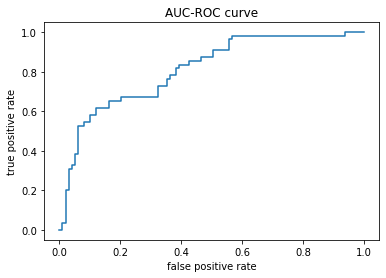

In [25]:
# to draw the curve use data visualization--> matplotlib

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC-ROC curve')

In [26]:
# now calculate the area it has covered

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,test_pred) # curve has covered 73% area

0.7363636363636363

# Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,test_pred)  # like we studied in class 78->TN, 21->FP, 18->FN, 37->TP

array([[81, 18],
       [19, 36]], dtype=int64)

# Precision

In [29]:
from sklearn.metrics import precision_score

precision_score(y_test,test_pred)

0.6666666666666666

# Recall

In [30]:
from sklearn.metrics import recall_score

recall_score(y_test,test_pred)

0.6545454545454545

# f1-score

In [31]:
from sklearn.metrics import f1_score    # f1-score=(2pr/(p+r))  p-->precision, r--> recall

f1_score(y_test,test_pred)

0.6605504587155963

# Accuracy

In [32]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,train_pred)) # Train Accuracy
print(accuracy_score(y_test,test_pred)) # Test accuracy

0.7687296416938111
0.7597402597402597


# Hierarchical clustering

In [33]:
from sklearn.preprocessing import normalize
data_scaled = normalize(di_df)
data_scaled = pd.DataFrame(data_scaled, columns=di_df.columns)
data_scaled

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.036655,0.904149,0.213819,0.000000,0.205266,0.003830,0.305456
1,0.010135,0.861461,0.293910,0.000000,0.269587,0.003557,0.314180
2,0.042688,0.976499,0.000000,0.000000,0.124330,0.003586,0.170754
3,0.007349,0.654029,0.169019,0.690773,0.206497,0.001227,0.154322
4,0.000000,0.605639,0.154725,0.742681,0.190533,0.010115,0.145884
...,...,...,...,...,...,...,...
763,0.044696,0.451431,0.214541,0.804531,0.147050,0.000764,0.281586
764,0.015033,0.916999,0.202942,0.000000,0.276603,0.002556,0.202942
765,0.029198,0.706582,0.134309,0.654026,0.152995,0.001431,0.175186
766,0.007256,0.914289,0.000000,0.000000,0.218414,0.002532,0.341044


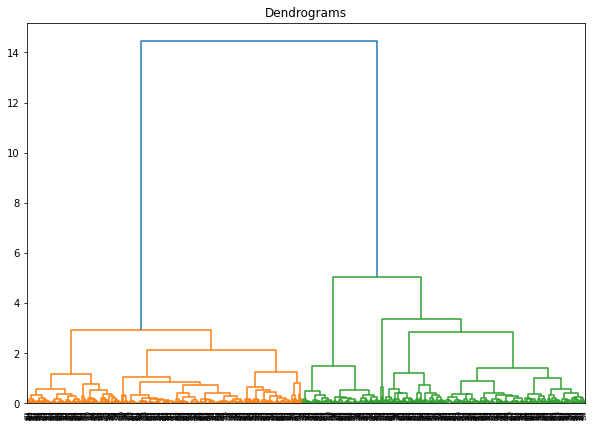

In [34]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
#d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=6,min_samples_leaf=3,max_leaf_nodes=3)
d_tree.fit(x_train,y_train)

d_tree_test_pred=d_tree.predict(x_test)
d_tree_train_pred=d_tree.predict(x_train)

d_tree_probabs=d_tree.predict_proba(x_test)
pos_probabs=d_tree_probabs[::,1]

# auc-roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)

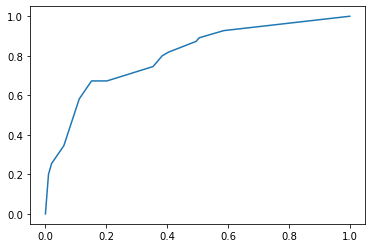

In [36]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

In [37]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,d_tree_test_pred)

array([[84, 15],
       [18, 37]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score

precision_score(y_test,d_tree_test_pred)

0.7115384615384616

In [39]:
from sklearn.metrics import recall_score

recall_score(y_test,d_tree_test_pred)

0.6727272727272727

In [40]:
from sklearn.metrics import f1_score

f1_score(y_test,d_tree_test_pred)

0.6915887850467289

In [41]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,d_tree_train_pred)) # Train accuracy
print(accuracy_score(y_test,d_tree_test_pred)) # Test accuracy

0.8322475570032574
0.7857142857142857


# Decision tree with HYPER PARAMETER TUNING

# GRID SEARCH CV

In [42]:
# GRID SEARCH CV

from sklearn.model_selection import GridSearchCV

dt_c=DecisionTreeClassifier()

param_grid_dict={'max_depth':[4,5,6,7,9,10,12],'min_samples_split':[3,4,5,6,7,8],'min_samples_leaf':[2,3,4,5,6,7],'max_leaf_nodes':[2,3,4,5,6,7]}

gcv=GridSearchCV(dt_c,param_grid=param_grid_dict,cv=5,verbose=17)

gcv.fit(x_train,y_train)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
[CV 1/5; 1/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 1/5; 1/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/5; 1/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 2/5; 1/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/5; 1/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 3/5; 1/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/5; 1/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 4/5; 1/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/5; 1/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 5/5; 1/1512] 

[CV 3/5; 16/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/5; 16/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 4/5; 16/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/5; 16/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 5/5; 16/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 17/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7
[CV 1/5; 17/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/5; 17/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7
[CV 2/5; 17/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/5; 17/1512] START max_depth=4, max_leaf_nodes=2, 

[CV 5/5; 24/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 1/5; 25/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 1/5; 25/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/5; 25/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 2/5; 25/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 25/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 3/5; 25/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 25/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 25/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 25/1512] START max_depth=4, max_leaf_nodes=2, 

[CV 1/5; 33/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 2/5; 33/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 2/5; 33/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 3/5; 33/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 3/5; 33/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 4/5; 33/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 4/5; 33/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 5/5; 33/1512] START max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 5/5; 33/1512] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 34/1512] START max_depth=4, max_leaf_nodes=2, 

[CV 3/5; 42/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 4/5; 42/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8
[CV 4/5; 42/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 5/5; 42/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8
[CV 5/5; 42/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 43/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 43/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 43/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 43/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 43/1512] START max_depth=4, max_leaf_nodes=3, 

[CV 4/5; 50/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/5; 50/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=4
[CV 5/5; 50/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 1/5; 51/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 1/5; 51/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 2/5; 51/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 51/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 3/5; 51/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 51/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 4/5; 51/1512] START max_depth=4, max_leaf_nodes=3, 

[CV 5/5; 64/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 1/5; 65/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 1/5; 65/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 2/5; 65/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 2/5; 65/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 3/5; 65/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 3/5; 65/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/5; 65/1512] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 4/5; 65/1512] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 5/5; 65/1512] START max_depth=4, max_leaf_nodes=3, 

[CV 1/5; 79/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 79/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 79/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 79/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 3/5; 79/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/5; 79/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 79/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 79/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 5/5; 79/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/5; 80/1512] START max_depth=4, max_leaf_nodes=4, 

[CV 1/5; 92/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 2/5; 92/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4
[CV 2/5; 92/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 3/5; 92/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4
[CV 3/5; 92/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 4/5; 92/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4
[CV 4/5; 92/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 5/5; 92/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4
[CV 5/5; 92/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 1/5; 93/1512] START max_depth=4, max_leaf_nodes=4, 

[CV 4/5; 105/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 5/5; 105/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5
[CV 5/5; 105/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 106/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 106/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 106/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6
[CV 2/5; 106/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 106/1512] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6
[CV 3/5; 106/1512] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 4/5; 106/1512] START max_depth=4, max_leaf

[CV 4/5; 113/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 5/5; 113/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 5/5; 113/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 1/5; 114/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=8
[CV 1/5; 114/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 2/5; 114/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=8
[CV 2/5; 114/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 3/5; 114/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=8
[CV 3/5; 114/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 4/5; 114/1512] START max_depth=4, max_leaf

[CV 5/5; 121/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/5; 122/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4
[CV 1/5; 122/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/5; 122/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4
[CV 2/5; 122/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/5; 122/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4
[CV 3/5; 122/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/5; 122/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4
[CV 4/5; 122/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/5; 122/1512] START max_depth=4, max_leaf

[CV 2/5; 130/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 3/5; 130/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 3/5; 130/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 4/5; 130/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 4/5; 130/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 5/5; 130/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 5/5; 130/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 1/5; 131/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7
[CV 1/5; 131/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 2/5; 131/1512] START max_depth=4, max_leaf

[CV 2/5; 139/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 3/5; 139/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3
[CV 3/5; 139/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 4/5; 139/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3
[CV 4/5; 139/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 5/5; 139/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3
[CV 5/5; 139/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 1/5; 140/1512] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=4
[CV 1/5; 140/1512] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 2/5; 140/1512] START max_depth=4, max_leaf

[CV 5/5; 147/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 1/5; 148/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 1/5; 148/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 2/5; 148/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 2/5; 148/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 3/5; 148/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 3/5; 148/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 4/5; 148/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 4/5; 148/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 5/5; 148/1512] START max_depth=4, max_leaf

[CV 1/5; 157/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 157/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3
[CV 2/5; 157/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/5; 157/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3
[CV 3/5; 157/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/5; 157/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3
[CV 4/5; 157/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/5; 157/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3
[CV 5/5; 157/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/5; 158/1512] START max_depth=4, max_leaf

[CV 1/5; 165/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 1/5; 165/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 2/5; 165/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 2/5; 165/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 165/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 165/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 165/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 165/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 165/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 165/1512] END max_depth=4, max_leaf_nodes=6, min_sample

[CV 3/5; 173/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/5; 173/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7
[CV 4/5; 173/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 5/5; 173/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7
[CV 5/5; 173/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 1/5; 174/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8
[CV 1/5; 174/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 174/1512] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8
[CV 2/5; 174/1512] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 174/1512] START max_depth=4, max_leaf

[CV 2/5; 182/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/5; 182/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4
[CV 3/5; 182/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/5; 182/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4
[CV 4/5; 182/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/5; 182/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4
[CV 5/5; 182/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 1/5; 183/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=5
[CV 1/5; 183/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5; 183/1512] START max_depth=4, max_leaf

[CV 3/5; 190/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/5; 190/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 4/5; 190/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/5; 190/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6
[CV 5/5; 190/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/5; 191/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 1/5; 191/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/5; 191/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 2/5; 191/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/5; 191/1512] START max_depth=4, max_leaf

[CV 2/5; 207/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/5; 207/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 207/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/5; 207/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 207/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/5; 207/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 207/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/5; 208/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 1/5; 208/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/5; 208/1512] START max_depth=4, max_leaf

[CV 5/5; 215/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 1/5; 216/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8
[CV 1/5; 216/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 2/5; 216/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8
[CV 2/5; 216/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 3/5; 216/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8
[CV 3/5; 216/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 4/5; 216/1512] START max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8
[CV 4/5; 216/1512] END max_depth=4, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 5/5; 216/1512] START max_depth=4, max_leaf

[CV 5/5; 224/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/5; 225/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 1/5; 225/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/5; 225/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 2/5; 225/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/5; 225/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 3/5; 225/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 225/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 225/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 225/1512] START max_depth=5, max_leaf

[CV 4/5; 233/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/5; 233/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7
[CV 5/5; 233/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/5; 234/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8
[CV 1/5; 234/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 2/5; 234/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8
[CV 2/5; 234/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 3/5; 234/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8
[CV 3/5; 234/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 4/5; 234/1512] START max_depth=5, max_leaf

[CV 3/5; 242/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 4/5; 242/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4
[CV 4/5; 242/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 5/5; 242/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4
[CV 5/5; 242/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 1/5; 243/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5
[CV 1/5; 243/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/5; 243/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 243/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/5; 243/1512] START max_depth=5, max_leaf

[CV 3/5; 251/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 4/5; 251/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7
[CV 4/5; 251/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 5/5; 251/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7
[CV 5/5; 251/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 1/5; 252/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8
[CV 1/5; 252/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 2/5; 252/1512] START max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8
[CV 2/5; 252/1512] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 3/5; 252/1512] START max_depth=5, max_leaf

[CV 5/5; 260/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/5; 261/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 1/5; 261/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/5; 261/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 2/5; 261/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/5; 261/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 3/5; 261/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 261/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 261/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 261/1512] START max_depth=5, max_leaf

[CV 3/5; 269/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/5; 269/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7
[CV 4/5; 269/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/5; 269/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7
[CV 5/5; 269/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/5; 270/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8
[CV 1/5; 270/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 2/5; 270/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8
[CV 2/5; 270/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 3/5; 270/1512] START max_depth=5, max_leaf

[CV 3/5; 277/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 277/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 277/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 277/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 5/5; 277/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/5; 278/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=4
[CV 1/5; 278/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/5; 278/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=4
[CV 2/5; 278/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 3/5; 278/1512] START max_depth=5, max_leaf

[CV 5/5; 286/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 1/5; 287/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7
[CV 1/5; 287/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 2/5; 287/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7
[CV 2/5; 287/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 3/5; 287/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7
[CV 3/5; 287/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 4/5; 287/1512] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7
[CV 4/5; 287/1512] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 5/5; 287/1512] START max_depth=5, max_leaf

[CV 1/5; 296/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/5; 296/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 2/5; 296/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/5; 296/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 3/5; 296/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/5; 296/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 4/5; 296/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/5; 296/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 5/5; 296/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/5; 297/1512] START max_depth=5, max_leaf

[CV 1/5; 304/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 2/5; 304/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6
[CV 2/5; 304/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/5; 304/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6
[CV 3/5; 304/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/5; 304/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6
[CV 4/5; 304/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/5; 304/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6
[CV 5/5; 304/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 305/1512] START max_depth=5, max_leaf

[CV 3/5; 312/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 4/5; 312/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8
[CV 4/5; 312/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 5/5; 312/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8
[CV 5/5; 312/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 1/5; 313/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3
[CV 1/5; 313/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/5; 313/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3
[CV 2/5; 313/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 313/1512] START max_depth=5, max_leaf

[CV 4/5; 320/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 5/5; 320/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4
[CV 5/5; 320/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 1/5; 321/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5
[CV 1/5; 321/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 2/5; 321/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5
[CV 2/5; 321/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 3/5; 321/1512] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5
[CV 3/5; 321/1512] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 4/5; 321/1512] START max_depth=5, max_leaf

[CV 1/5; 329/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 2/5; 329/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 2/5; 329/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 3/5; 329/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 3/5; 329/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 4/5; 329/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 4/5; 329/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 5/5; 329/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 5/5; 329/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 1/5; 330/1512] START max_depth=5, max_leaf

[CV 3/5; 337/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/5; 337/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 4/5; 337/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/5; 337/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 5/5; 337/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/5; 338/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4
[CV 1/5; 338/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/5; 338/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4
[CV 2/5; 338/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/5; 338/1512] START max_depth=5, max_leaf

[CV 3/5; 345/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 345/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 345/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 345/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 345/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 346/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 346/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/5; 346/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 2/5; 346/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 3/5; 346/1512] START max_depth=5, max_leaf

[CV 3/5; 354/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 4/5; 354/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 4/5; 354/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 5/5; 354/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 5/5; 354/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 1/5; 355/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3
[CV 1/5; 355/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 2/5; 355/1512] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3
[CV 2/5; 355/1512] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 3/5; 355/1512] START max_depth=5, max_leaf

[CV 4/5; 363/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 5/5; 363/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=5
[CV 5/5; 363/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 1/5; 364/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 1/5; 364/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 2/5; 364/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 2/5; 364/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 3/5; 364/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6
[CV 3/5; 364/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 4/5; 364/1512] START max_depth=5, max_leaf

[CV 1/5; 380/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 2/5; 380/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 2/5; 380/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 3/5; 380/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 3/5; 380/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 4/5; 380/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 4/5; 380/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 5/5; 380/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4
[CV 5/5; 380/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 1/5; 381/1512] START max_depth=5, max_leaf

[CV 3/5; 396/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 4/5; 396/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 4/5; 396/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 5/5; 396/1512] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 5/5; 396/1512] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 1/5; 397/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3
[CV 1/5; 397/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/5; 397/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3
[CV 2/5; 397/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/5; 397/1512] START max_depth=5, max_leaf

[CV 1/5; 405/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/5; 405/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 2/5; 405/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/5; 405/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 3/5; 405/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 405/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 405/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 405/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 5/5; 405/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/5; 406/1512] START max_depth=5, max_leaf

[CV 4/5; 413/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/5; 413/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 5/5; 413/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/5; 414/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8
[CV 1/5; 414/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 2/5; 414/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8
[CV 2/5; 414/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 3/5; 414/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8
[CV 3/5; 414/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 4/5; 414/1512] START max_depth=5, max_leaf

[CV 5/5; 421/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/5; 422/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 1/5; 422/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/5; 422/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 2/5; 422/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 3/5; 422/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 3/5; 422/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 4/5; 422/1512] START max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 4/5; 422/1512] END max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 5/5; 422/1512] START max_depth=5, max_leaf

[CV 5/5; 438/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 439/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 439/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 439/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 439/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 439/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 3/5; 439/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/5; 439/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 439/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 439/1512] START max_depth=6, max_leaf

[CV 3/5; 448/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/5; 448/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 4/5; 448/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/5; 448/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 5/5; 448/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 449/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7
[CV 1/5; 449/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/5; 449/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7
[CV 2/5; 449/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/5; 449/1512] START max_depth=6, max_leaf

[CV 3/5; 457/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 457/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 457/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 457/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 5/5; 457/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/5; 458/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4
[CV 1/5; 458/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/5; 458/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4
[CV 2/5; 458/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 3/5; 458/1512] START max_depth=6, max_leaf

[CV 5/5; 465/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 5/5; 465/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 466/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 466/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 466/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 2/5; 466/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 466/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 3/5; 466/1512] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 4/5; 466/1512] START max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 4/5; 466/1512] END max_depth=6, max_leaf_nodes=2, min_sample

[CV 1/5; 475/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 475/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 475/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 475/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 3/5; 475/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/5; 475/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 475/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 475/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 5/5; 475/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/5; 476/1512] START max_depth=6, max_leaf

[CV 1/5; 484/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 2/5; 484/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6
[CV 2/5; 484/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/5; 484/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6
[CV 3/5; 484/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/5; 484/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6
[CV 4/5; 484/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/5; 484/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6
[CV 5/5; 484/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 485/1512] START max_depth=6, max_leaf

[CV 5/5; 492/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 1/5; 493/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 1/5; 493/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/5; 493/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 2/5; 493/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 493/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 3/5; 493/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 493/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 493/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 493/1512] START max_depth=6, max_leaf

[CV 3/5; 501/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 4/5; 501/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5
[CV 4/5; 501/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 5/5; 501/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5
[CV 5/5; 501/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 502/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 502/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 502/1512] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6
[CV 2/5; 502/1512] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 502/1512] START max_depth=6, max_leaf

[CV 2/5; 510/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 3/5; 510/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8
[CV 3/5; 510/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 4/5; 510/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8
[CV 4/5; 510/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 5/5; 510/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8
[CV 5/5; 510/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 511/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 511/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 511/1512] START max_depth=6, max_leaf

[CV 1/5; 519/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 2/5; 519/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 519/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 3/5; 519/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 519/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 4/5; 519/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 519/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 5/5; 519/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 519/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 1/5; 520/1512] START max_depth=6, max_leaf

[CV 1/5; 527/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 2/5; 527/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7
[CV 2/5; 527/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 3/5; 527/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7
[CV 3/5; 527/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 4/5; 527/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7
[CV 4/5; 527/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 5/5; 527/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7
[CV 5/5; 527/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/5; 528/1512] START max_depth=6, max_leaf

[CV 4/5; 535/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 5/5; 535/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3
[CV 5/5; 535/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 1/5; 536/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4
[CV 1/5; 536/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 2/5; 536/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4
[CV 2/5; 536/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 3/5; 536/1512] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4
[CV 3/5; 536/1512] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 4/5; 536/1512] START max_depth=6, max_leaf

[CV 1/5; 544/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 2/5; 544/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6
[CV 2/5; 544/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 3/5; 544/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6
[CV 3/5; 544/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 4/5; 544/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6
[CV 4/5; 544/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 5/5; 544/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6
[CV 5/5; 544/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 1/5; 545/1512] START max_depth=6, max_leaf

[CV 4/5; 552/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 5/5; 552/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 5/5; 552/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 1/5; 553/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 1/5; 553/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 553/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 2/5; 553/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/5; 553/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 3/5; 553/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/5; 553/1512] START max_depth=6, max_leaf

[CV 3/5; 561/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 561/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 561/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 561/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 561/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 562/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 562/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/5; 562/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 2/5; 562/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 3/5; 562/1512] START max_depth=6, max_leaf

[CV 3/5; 569/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/5; 569/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7
[CV 4/5; 569/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 5/5; 569/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7
[CV 5/5; 569/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 1/5; 570/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 1/5; 570/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 570/1512] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 2/5; 570/1512] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 570/1512] START max_depth=6, max_leaf

[CV 2/5; 582/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 3/5; 582/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8
[CV 3/5; 582/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 4/5; 582/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8
[CV 4/5; 582/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 5/5; 582/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8
[CV 5/5; 582/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 583/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 583/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 583/1512] START max_depth=6, max_leaf

[CV 4/5; 597/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 597/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 597/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 598/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 598/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/5; 598/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6
[CV 2/5; 598/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 3/5; 598/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6
[CV 3/5; 598/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 4/5; 598/1512] START max_depth=6, max_leaf

[CV 1/5; 606/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 606/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8
[CV 2/5; 606/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 606/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8
[CV 3/5; 606/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 4/5; 606/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8
[CV 4/5; 606/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 5/5; 606/1512] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8
[CV 5/5; 606/1512] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 1/5; 607/1512] START max_depth=6, max_leaf

[CV 3/5; 614/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/5; 614/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4
[CV 4/5; 614/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/5; 614/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4
[CV 5/5; 614/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 1/5; 615/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=5
[CV 1/5; 615/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5; 615/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=5
[CV 2/5; 615/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 3/5; 615/1512] START max_depth=6, max_leaf

[CV 2/5; 623/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/5; 623/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 3/5; 623/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 4/5; 623/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 4/5; 623/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 5/5; 623/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7
[CV 5/5; 623/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 1/5; 624/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=8
[CV 1/5; 624/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 2/5; 624/1512] START max_depth=6, max_leaf

[CV 1/5; 632/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 2/5; 632/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 2/5; 632/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 3/5; 632/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 3/5; 632/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 4/5; 632/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 4/5; 632/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 5/5; 632/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4
[CV 5/5; 632/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 1/5; 633/1512] START max_depth=6, max_leaf

[CV 2/5; 640/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/5; 640/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 3/5; 640/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 4/5; 640/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 4/5; 640/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 5/5; 640/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 5/5; 640/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 1/5; 641/1512] START max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7
[CV 1/5; 641/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 2/5; 641/1512] START max_depth=6, max_leaf

[CV 5/5; 648/1512] END max_depth=6, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 1/5; 649/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 1/5; 649/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/5; 649/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 2/5; 649/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/5; 649/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 3/5; 649/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/5; 649/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3
[CV 4/5; 649/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/5; 649/1512] START max_depth=7, max_leaf

[CV 2/5; 657/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/5; 657/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 3/5; 657/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 657/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 657/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 657/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5
[CV 5/5; 657/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/5; 658/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6
[CV 1/5; 658/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/5; 658/1512] START max_depth=7, max_leaf

[CV 3/5; 666/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 4/5; 666/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8
[CV 4/5; 666/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 5/5; 666/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8
[CV 5/5; 666/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 1/5; 667/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=3
[CV 1/5; 667/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/5; 667/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=3
[CV 2/5; 667/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/5; 667/1512] START max_depth=7, max_leaf

[CV 5/5; 675/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 675/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/5; 676/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6
[CV 1/5; 676/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/5; 676/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6
[CV 2/5; 676/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/5; 676/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6
[CV 3/5; 676/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 4/5; 676/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6
[CV 4/5; 676/1512] END max_depth=7, max_leaf_nodes=2, min_sample

[CV 4/5; 684/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 5/5; 684/1512] START max_depth=7, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8
[CV 5/5; 684/1512] END max_depth=7, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 1/5; 685/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=3
[CV 1/5; 685/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/5; 685/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=3
[CV 2/5; 685/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/5; 685/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=3
[CV 3/5; 685/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/5; 685/1512] START max_depth=7, max_leaf

[CV 1/5; 693/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/5; 693/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 2/5; 693/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/5; 693/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 3/5; 693/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 693/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 693/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 693/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5
[CV 5/5; 693/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/5; 694/1512] START max_depth=7, max_leaf

[CV 3/5; 702/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8
[CV 3/5; 702/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 4/5; 702/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8
[CV 4/5; 702/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 5/5; 702/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8
[CV 5/5; 702/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 1/5; 703/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=3
[CV 1/5; 703/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/5; 703/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=3
[CV 2/5; 703/1512] END max_depth=7, max_leaf_nodes=3, min_sample

[CV 5/5; 710/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 1/5; 711/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 1/5; 711/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/5; 711/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 711/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/5; 711/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 711/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/5; 711/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 711/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/5; 711/1512] START max_depth=7, max_leaf

[CV 4/5; 719/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 5/5; 719/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7
[CV 5/5; 719/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 1/5; 720/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8
[CV 1/5; 720/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 2/5; 720/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8
[CV 2/5; 720/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 3/5; 720/1512] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8
[CV 3/5; 720/1512] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 4/5; 720/1512] START max_depth=7, max_leaf

[CV 4/5; 727/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 727/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 727/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3
[CV 5/5; 727/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/5; 728/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 1/5; 728/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/5; 728/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 2/5; 728/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/5; 728/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=4
[CV 3/5; 728/1512] END max_depth=7, max_leaf_nodes=4, min_sample

[CV 5/5; 736/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 737/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7
[CV 1/5; 737/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/5; 737/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7
[CV 2/5; 737/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/5; 737/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7
[CV 3/5; 737/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/5; 737/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7
[CV 4/5; 737/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/5; 737/1512] START max_depth=7, max_leaf

[CV 3/5; 745/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 745/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 745/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 745/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3
[CV 5/5; 745/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/5; 746/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=4
[CV 1/5; 746/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/5; 746/1512] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=4
[CV 2/5; 746/1512] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 3/5; 746/1512] START max_depth=7, max_leaf

[CV 4/5; 760/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 5/5; 760/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6
[CV 5/5; 760/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 1/5; 761/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 1/5; 761/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 2/5; 761/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 2/5; 761/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 3/5; 761/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7
[CV 3/5; 761/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 4/5; 761/1512] START max_depth=7, max_leaf

[CV 4/5; 768/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 4/5; 768/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 5/5; 768/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 5/5; 768/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 1/5; 769/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 1/5; 769/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 769/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 2/5; 769/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/5; 769/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 3/5; 769/1512] END max_depth=7, max_leaf_nodes=5, min_sample

[CV 2/5; 777/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 777/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 777/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 777/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 777/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 777/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 777/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 778/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 778/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/5; 778/1512] START max_depth=7, max_leaf

[CV 5/5; 785/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 1/5; 786/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 1/5; 786/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 786/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 2/5; 786/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 786/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 3/5; 786/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 4/5; 786/1512] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 4/5; 786/1512] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 5/5; 786/1512] START max_depth=7, max_leaf

[CV 2/5; 794/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/5; 794/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 3/5; 794/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/5; 794/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 4/5; 794/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/5; 794/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 5/5; 794/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 1/5; 795/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=5
[CV 1/5; 795/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5; 795/1512] START max_depth=7, max_leaf

[CV 4/5; 810/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 5/5; 810/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=8
[CV 5/5; 810/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 1/5; 811/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 1/5; 811/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/5; 811/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 2/5; 811/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/5; 811/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 3/5; 811/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/5; 811/1512] START max_depth=7, max_leaf

[CV 2/5; 819/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/5; 819/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 819/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/5; 819/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 819/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/5; 819/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 819/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/5; 820/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 1/5; 820/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/5; 820/1512] START max_depth=7, max_leaf

[CV 5/5; 827/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 1/5; 828/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 1/5; 828/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 2/5; 828/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 2/5; 828/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 3/5; 828/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 3/5; 828/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 4/5; 828/1512] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 4/5; 828/1512] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 5/5; 828/1512] START max_depth=7, max_leaf

[CV 1/5; 836/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/5; 836/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 2/5; 836/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/5; 836/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 3/5; 836/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/5; 836/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 4/5; 836/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/5; 836/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 5/5; 836/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/5; 837/1512] START max_depth=7, max_leaf

[CV 1/5; 844/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 2/5; 844/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6
[CV 2/5; 844/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/5; 844/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6
[CV 3/5; 844/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/5; 844/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6
[CV 4/5; 844/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/5; 844/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6
[CV 5/5; 844/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 845/1512] START max_depth=7, max_leaf

[CV 5/5; 852/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 1/5; 853/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 1/5; 853/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/5; 853/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 2/5; 853/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 853/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 3/5; 853/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 853/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 853/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 853/1512] START max_depth=7, max_leaf

[CV 5/5; 861/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 862/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 862/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 862/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 2/5; 862/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 862/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 3/5; 862/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 4/5; 862/1512] START max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 4/5; 862/1512] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 5/5; 862/1512] START max_depth=7, max_leaf

[CV 1/5; 871/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 871/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 871/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 871/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 3/5; 871/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/5; 871/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 871/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 871/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 5/5; 871/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/5; 872/1512] START max_depth=9, max_leaf

[CV 3/5; 879/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 4/5; 879/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 879/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 5/5; 879/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 879/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 1/5; 880/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 1/5; 880/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 2/5; 880/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 2/5; 880/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/5; 880/1512] START max_depth=9, max_leaf

[CV 5/5; 887/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/5; 888/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8
[CV 1/5; 888/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 2/5; 888/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8
[CV 2/5; 888/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 3/5; 888/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8
[CV 3/5; 888/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 4/5; 888/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8
[CV 4/5; 888/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 5/5; 888/1512] START max_depth=9, max_leaf

[CV 2/5; 897/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 3/5; 897/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 3/5; 897/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 4/5; 897/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 4/5; 897/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 5/5; 897/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5
[CV 5/5; 897/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 898/1512] START max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 898/1512] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 898/1512] START max_depth=9, max_leaf

[CV 3/5; 906/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 4/5; 906/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8
[CV 4/5; 906/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 5/5; 906/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8
[CV 5/5; 906/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 907/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 907/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 907/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 907/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 907/1512] START max_depth=9, max_leaf

[CV 4/5; 914/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/5; 914/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=4
[CV 5/5; 914/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 1/5; 915/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 1/5; 915/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 2/5; 915/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 915/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 3/5; 915/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 915/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 4/5; 915/1512] START max_depth=9, max_leaf

[CV 5/5; 922/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 1/5; 923/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7
[CV 1/5; 923/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 2/5; 923/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7
[CV 2/5; 923/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 3/5; 923/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7
[CV 3/5; 923/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 4/5; 923/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7
[CV 4/5; 923/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 5/5; 923/1512] START max_depth=9, max_leaf

[CV 5/5; 931/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 1/5; 932/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4
[CV 1/5; 932/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 2/5; 932/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4
[CV 2/5; 932/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 3/5; 932/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4
[CV 3/5; 932/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 4/5; 932/1512] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4
[CV 4/5; 932/1512] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 5/5; 932/1512] START max_depth=9, max_leaf

[CV 4/5; 940/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 5/5; 940/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6
[CV 5/5; 940/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 1/5; 941/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7
[CV 1/5; 941/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 2/5; 941/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7
[CV 2/5; 941/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 3/5; 941/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7
[CV 3/5; 941/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 4/5; 941/1512] START max_depth=9, max_leaf

[CV 1/5; 949/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 949/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3
[CV 2/5; 949/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/5; 949/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3
[CV 3/5; 949/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/5; 949/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3
[CV 4/5; 949/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/5; 949/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3
[CV 5/5; 949/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/5; 950/1512] START max_depth=9, max_leaf

[CV 1/5; 957/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 2/5; 957/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5
[CV 2/5; 957/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 957/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 957/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 957/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 957/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 957/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 957/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 958/1512] START max_depth=9, max_leaf

[CV 2/5; 966/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 966/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8
[CV 3/5; 966/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 4/5; 966/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8
[CV 4/5; 966/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 5/5; 966/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8
[CV 5/5; 966/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 1/5; 967/1512] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3
[CV 1/5; 967/1512] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 2/5; 967/1512] START max_depth=9, max_leaf

[CV 1/5; 975/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5; 975/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 2/5; 975/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 3/5; 975/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 3/5; 975/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 4/5; 975/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 4/5; 975/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 5/5; 975/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 5/5; 975/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 1/5; 976/1512] START max_depth=9, max_leaf

[CV 4/5; 983/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 5/5; 983/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=7
[CV 5/5; 983/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 1/5; 984/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 1/5; 984/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 2/5; 984/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 2/5; 984/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 3/5; 984/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 3/5; 984/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 4/5; 984/1512] START max_depth=9, max_leaf

[CV 4/5; 992/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 5/5; 992/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=4
[CV 5/5; 992/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 1/5; 993/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 1/5; 993/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 2/5; 993/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 2/5; 993/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 993/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 993/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 993/1512] START max_depth=9, max_leaf

[CV 2/5; 1001/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 3/5; 1001/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7
[CV 3/5; 1001/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/5; 1001/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7
[CV 4/5; 1001/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 5/5; 1001/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7
[CV 5/5; 1001/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 1/5; 1002/1512] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 1/5; 1002/1512] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 1002/1512] START max_depth=9

[CV 1/5; 1010/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/5; 1010/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 2/5; 1010/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/5; 1010/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 3/5; 1010/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/5; 1010/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 4/5; 1010/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/5; 1010/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 5/5; 1010/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 1/5; 1011/1512] START max_depth=9

[CV 5/5; 1018/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/5; 1019/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 1/5; 1019/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/5; 1019/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 2/5; 1019/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/5; 1019/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 3/5; 1019/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 4/5; 1019/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7
[CV 4/5; 1019/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 5/5; 1019/1512] START max_depth=9

[CV 1/5; 1027/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/5; 1027/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 2/5; 1027/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/5; 1027/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 3/5; 1027/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/5; 1027/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 4/5; 1027/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 5/5; 1027/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 5/5; 1027/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 1/5; 1028/1512] START max_depth=9

[CV 1/5; 1035/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 2/5; 1035/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 1035/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 3/5; 1035/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 1035/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 4/5; 1035/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 1035/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/5; 1035/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 1035/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/5; 1036/1512] START max_depth=9

[CV 3/5; 1043/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 4/5; 1043/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=7
[CV 4/5; 1043/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 5/5; 1043/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=7
[CV 5/5; 1043/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 1/5; 1044/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 1/5; 1044/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 2/5; 1044/1512] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8
[CV 2/5; 1044/1512] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 3/5; 1044/1512] START max_depth=9

[CV 5/5; 1051/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/5; 1052/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 1/5; 1052/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/5; 1052/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 2/5; 1052/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/5; 1052/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 3/5; 1052/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/5; 1052/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4
[CV 4/5; 1052/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/5; 1052/1512] START max_depth=9

[CV 5/5; 1060/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 1061/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 1/5; 1061/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 2/5; 1061/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 2/5; 1061/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 3/5; 1061/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 3/5; 1061/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/5; 1061/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 4/5; 1061/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/5; 1061/1512] START max_depth=9

[CV 2/5; 1069/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 1069/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 3/5; 1069/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 1069/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 1069/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 1069/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3
[CV 5/5; 1069/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/5; 1070/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4
[CV 1/5; 1070/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/5; 1070/1512] START max_depth=9

[CV 4/5; 1077/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 5/5; 1077/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5
[CV 5/5; 1077/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 1078/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 1078/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 1078/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 2/5; 1078/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 1078/1512] START max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6
[CV 3/5; 1078/1512] END max_depth=9, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 4/5; 1078/1512] START max_depth=9

[CV 5/5; 1086/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 1087/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 1087/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 1087/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 1087/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 1087/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 3/5; 1087/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/5; 1087/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 1087/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 1087/1512] START ma

[CV 1/5; 1096/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 2/5; 1096/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 2/5; 1096/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/5; 1096/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 3/5; 1096/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 4/5; 1096/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 4/5; 1096/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 5/5; 1096/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6
[CV 5/5; 1096/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 1/5; 1097/1512] START ma

[CV 5/5; 1104/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 1/5; 1105/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 1/5; 1105/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/5; 1105/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 2/5; 1105/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 1105/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 3/5; 1105/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 1105/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 1105/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 1105/1512] START ma

[CV 5/5; 1113/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 1/5; 1114/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 1/5; 1114/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 2/5; 1114/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 2/5; 1114/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 1114/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 3/5; 1114/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 4/5; 1114/1512] START max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6
[CV 4/5; 1114/1512] END max_depth=10, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 5/5; 1114/1512] START ma

[CV 3/5; 1122/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 4/5; 1122/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8
[CV 4/5; 1122/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 5/5; 1122/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8
[CV 5/5; 1122/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 1/5; 1123/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 1/5; 1123/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 1123/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 1123/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 1123/1512] START ma

[CV 3/5; 1131/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 4/5; 1131/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 1131/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 5/5; 1131/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 1131/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 1/5; 1132/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6
[CV 1/5; 1132/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 2/5; 1132/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6
[CV 2/5; 1132/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV 3/5; 1132/1512] START ma

[CV 3/5; 1140/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 4/5; 1140/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8
[CV 4/5; 1140/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 5/5; 1140/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8
[CV 5/5; 1140/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 1/5; 1141/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 1/5; 1141/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 2/5; 1141/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3
[CV 2/5; 1141/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 1141/1512] START ma

[CV 5/5; 1148/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 1/5; 1149/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5
[CV 1/5; 1149/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 2/5; 1149/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5
[CV 2/5; 1149/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 3/5; 1149/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5
[CV 3/5; 1149/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 4/5; 1149/1512] START max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5
[CV 4/5; 1149/1512] END max_depth=10, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 5/5; 1149/1512] START ma

[CV 2/5; 1157/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 3/5; 1157/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7
[CV 3/5; 1157/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 4/5; 1157/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7
[CV 4/5; 1157/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 5/5; 1157/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7
[CV 5/5; 1157/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 1/5; 1158/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8
[CV 1/5; 1158/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV 2/5; 1158/1512] START ma

[CV 5/5; 1165/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/5; 1166/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4
[CV 1/5; 1166/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/5; 1166/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4
[CV 2/5; 1166/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/5; 1166/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4
[CV 3/5; 1166/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/5; 1166/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4
[CV 4/5; 1166/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/5; 1166/1512] START ma

[CV 2/5; 1174/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 3/5; 1174/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6
[CV 3/5; 1174/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 4/5; 1174/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6
[CV 4/5; 1174/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 5/5; 1174/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6
[CV 5/5; 1174/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 1/5; 1175/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7
[CV 1/5; 1175/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 2/5; 1175/1512] START ma

[CV 5/5; 1182/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 1/5; 1183/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3
[CV 1/5; 1183/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 2/5; 1183/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3
[CV 2/5; 1183/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 3/5; 1183/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3
[CV 3/5; 1183/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 4/5; 1183/1512] START max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3
[CV 4/5; 1183/1512] END max_depth=10, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV 5/5; 1183/1512] START ma

[CV 1/5; 1191/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5; 1191/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 2/5; 1191/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 3/5; 1191/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 3/5; 1191/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 4/5; 1191/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 4/5; 1191/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 5/5; 1191/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5
[CV 5/5; 1191/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 1/5; 1192/1512] START ma

[CV 2/5; 1200/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 3/5; 1200/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 3/5; 1200/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 4/5; 1200/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 4/5; 1200/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 5/5; 1200/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8
[CV 5/5; 1200/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 1/5; 1201/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3
[CV 1/5; 1201/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 1201/1512] START ma

[CV 2/5; 1209/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 1209/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 1209/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 1209/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 1209/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 1209/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 1209/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 1210/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 1210/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/5; 1210/1512] START ma

[CV 4/5; 1217/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 5/5; 1217/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7
[CV 5/5; 1217/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 1/5; 1218/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 1/5; 1218/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 1218/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 2/5; 1218/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 1218/1512] START max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8
[CV 3/5; 1218/1512] END max_depth=10, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 4/5; 1218/1512] START ma

[CV 4/5; 1225/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/5; 1225/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=3
[CV 5/5; 1225/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/5; 1226/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 1/5; 1226/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/5; 1226/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 2/5; 1226/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/5; 1226/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4
[CV 3/5; 1226/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/5; 1226/1512] START ma

[CV 1/5; 1234/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/5; 1234/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 2/5; 1234/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/5; 1234/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 3/5; 1234/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/5; 1234/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 4/5; 1234/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/5; 1234/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6
[CV 5/5; 1234/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/5; 1235/1512] START ma

[CV 1/5; 1243/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/5; 1243/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 2/5; 1243/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/5; 1243/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 3/5; 1243/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/5; 1243/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 4/5; 1243/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 5/5; 1243/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3
[CV 5/5; 1243/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 1/5; 1244/1512] START ma

[CV 1/5; 1252/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/5; 1252/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 2/5; 1252/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/5; 1252/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 3/5; 1252/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 4/5; 1252/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 4/5; 1252/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 5/5; 1252/1512] START max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6
[CV 5/5; 1252/1512] END max_depth=10, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 1/5; 1253/1512] START ma

[CV 1/5; 1261/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/5; 1261/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3
[CV 2/5; 1261/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/5; 1261/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3
[CV 3/5; 1261/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/5; 1261/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3
[CV 4/5; 1261/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/5; 1261/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3
[CV 5/5; 1261/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/5; 1262/1512] START ma

[CV 5/5; 1268/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 1/5; 1269/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 1/5; 1269/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 2/5; 1269/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 2/5; 1269/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 3/5; 1269/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 3/5; 1269/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 1269/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 1269/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 1269/1512] START ma

[CV 3/5; 1277/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 4/5; 1277/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 4/5; 1277/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 5/5; 1277/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7
[CV 5/5; 1277/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7; total time=   0.0s
[CV 1/5; 1278/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8
[CV 1/5; 1278/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 2/5; 1278/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8
[CV 2/5; 1278/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 3/5; 1278/1512] START ma

[CV 4/5; 1292/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 5/5; 1292/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=4
[CV 5/5; 1292/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 1/5; 1293/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5
[CV 1/5; 1293/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 2/5; 1293/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5
[CV 2/5; 1293/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 3/5; 1293/1512] START max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5
[CV 3/5; 1293/1512] END max_depth=10, max_leaf_nodes=7, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 4/5; 1293/1512] START ma

[CV 4/5; 1300/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 5/5; 1300/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6
[CV 5/5; 1300/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 1/5; 1301/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=7
[CV 1/5; 1301/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 2/5; 1301/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=7
[CV 2/5; 1301/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 3/5; 1301/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=7
[CV 3/5; 1301/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 4/5; 1301/1512] START ma

[CV 3/5; 1308/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 4/5; 1308/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8
[CV 4/5; 1308/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 5/5; 1308/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8
[CV 5/5; 1308/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 1/5; 1309/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=3
[CV 1/5; 1309/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 1309/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=3
[CV 2/5; 1309/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/5; 1309/1512] START ma

[CV 2/5; 1317/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 1317/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 1317/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 1317/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 1317/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 1317/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5
[CV 5/5; 1317/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 1/5; 1318/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 1318/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6; total time=   0.0s
[CV 2/5; 1318/1512] START ma

[CV 1/5; 1326/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 2/5; 1326/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8
[CV 2/5; 1326/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 3/5; 1326/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8
[CV 3/5; 1326/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 4/5; 1326/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8
[CV 4/5; 1326/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 5/5; 1326/1512] START max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8
[CV 5/5; 1326/1512] END max_depth=12, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV 1/5; 1327/1512] START ma

[CV 5/5; 1334/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 1/5; 1335/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5
[CV 1/5; 1335/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5; 1335/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5
[CV 2/5; 1335/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 3/5; 1335/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5
[CV 3/5; 1335/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 4/5; 1335/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5
[CV 4/5; 1335/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 5/5; 1335/1512] START ma

[CV 1/5; 1343/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/5; 1343/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7
[CV 2/5; 1343/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/5; 1343/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7
[CV 3/5; 1343/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 4/5; 1343/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7
[CV 4/5; 1343/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 5/5; 1343/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7
[CV 5/5; 1343/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 1/5; 1344/1512] START ma

[CV 4/5; 1351/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 5/5; 1351/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=3
[CV 5/5; 1351/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 1/5; 1352/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=4
[CV 1/5; 1352/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 2/5; 1352/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=4
[CV 2/5; 1352/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 3/5; 1352/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=4
[CV 3/5; 1352/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 4/5; 1352/1512] START ma

[CV 4/5; 1360/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 5/5; 1360/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6
[CV 5/5; 1360/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 1/5; 1361/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 1/5; 1361/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 2/5; 1361/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 2/5; 1361/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 3/5; 1361/1512] START max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7
[CV 3/5; 1361/1512] END max_depth=12, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/5; 1361/1512] START ma

[CV 5/5; 1369/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/5; 1370/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4
[CV 1/5; 1370/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/5; 1370/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4
[CV 2/5; 1370/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/5; 1370/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4
[CV 3/5; 1370/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/5; 1370/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4
[CV 4/5; 1370/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/5; 1370/1512] START ma

[CV 3/5; 1378/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 4/5; 1378/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=6
[CV 4/5; 1378/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 5/5; 1378/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=6
[CV 5/5; 1378/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 1/5; 1379/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=7
[CV 1/5; 1379/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 2/5; 1379/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=7
[CV 2/5; 1379/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=3, min_samples_split=7; total time=   0.0s
[CV 3/5; 1379/1512] START ma

[CV 5/5; 1386/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8
[CV 5/5; 1386/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV 1/5; 1387/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3
[CV 1/5; 1387/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 2/5; 1387/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3
[CV 2/5; 1387/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 3/5; 1387/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3
[CV 3/5; 1387/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV 4/5; 1387/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=3
[CV 4/5; 1387/1512] END max_depth=12, max_leaf

[CV 4/5; 1395/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 5/5; 1395/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 1395/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV 1/5; 1396/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6
[CV 1/5; 1396/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 2/5; 1396/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6
[CV 2/5; 1396/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 3/5; 1396/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6
[CV 3/5; 1396/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 4/5; 1396/1512] START ma

[CV 4/5; 1404/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 5/5; 1404/1512] START max_depth=12, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8
[CV 5/5; 1404/1512] END max_depth=12, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV 1/5; 1405/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=3
[CV 1/5; 1405/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/5; 1405/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=3
[CV 2/5; 1405/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/5; 1405/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=3
[CV 3/5; 1405/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/5; 1405/1512] START ma

[CV 3/5; 1413/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 4/5; 1413/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=5
[CV 4/5; 1413/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 5/5; 1413/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=5
[CV 5/5; 1413/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV 1/5; 1414/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=6
[CV 1/5; 1414/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 2/5; 1414/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=6
[CV 2/5; 1414/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV 3/5; 1414/1512] START ma

[CV 2/5; 1429/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 3/5; 1429/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3
[CV 3/5; 1429/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 4/5; 1429/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3
[CV 4/5; 1429/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 5/5; 1429/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3
[CV 5/5; 1429/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=3; total time=   0.0s
[CV 1/5; 1430/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=4
[CV 1/5; 1430/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV 2/5; 1430/1512] START ma

[CV 2/5; 1438/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 3/5; 1438/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6
[CV 3/5; 1438/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 4/5; 1438/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6
[CV 4/5; 1438/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 5/5; 1438/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6
[CV 5/5; 1438/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV 1/5; 1439/1512] START max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7
[CV 1/5; 1439/1512] END max_depth=12, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV 2/5; 1439/1512] START ma

[CV 1/5; 1447/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 2/5; 1447/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 2/5; 1447/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 3/5; 1447/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 3/5; 1447/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/5; 1447/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 4/5; 1447/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/5; 1447/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3
[CV 5/5; 1447/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/5; 1448/1512] START ma

[CV 1/5; 1455/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 2/5; 1455/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 1455/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 3/5; 1455/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 1455/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 4/5; 1455/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 1455/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 5/5; 1455/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 1455/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 1/5; 1456/1512] START ma

[CV 2/5; 1463/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 3/5; 1463/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7
[CV 3/5; 1463/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 4/5; 1463/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7
[CV 4/5; 1463/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 5/5; 1463/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7
[CV 5/5; 1463/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV 1/5; 1464/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=8
[CV 1/5; 1464/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV 2/5; 1464/1512] START ma

[CV 3/5; 1472/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 4/5; 1472/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=4
[CV 4/5; 1472/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 5/5; 1472/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=4
[CV 5/5; 1472/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV 1/5; 1473/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=5
[CV 1/5; 1473/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 2/5; 1473/1512] START max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=5
[CV 2/5; 1473/1512] END max_depth=12, max_leaf_nodes=6, min_samples_leaf=7, min_samples_split=5; total time=   0.0s
[CV 3/5; 1473/1512] START ma

[CV 5/5; 1480/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=6
[CV 5/5; 1480/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV 1/5; 1481/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7
[CV 1/5; 1481/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 2/5; 1481/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7
[CV 2/5; 1481/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 3/5; 1481/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7
[CV 3/5; 1481/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7; total time=   0.0s
[CV 4/5; 1481/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=2, min_samples_split=7
[CV 4/5; 1481/1512] END max_depth=12, max_leaf

[CV 4/5; 1488/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 5/5; 1488/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=8
[CV 5/5; 1488/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV 1/5; 1489/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3
[CV 1/5; 1489/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/5; 1489/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3
[CV 2/5; 1489/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/5; 1489/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3
[CV 3/5; 1489/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/5; 1489/1512] START ma

[CV 5/5; 1496/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV 1/5; 1497/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5
[CV 1/5; 1497/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 2/5; 1497/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5
[CV 2/5; 1497/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 1497/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5
[CV 3/5; 1497/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 1497/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 1497/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV 5/5; 1497/1512] START ma

[CV 4/5; 1504/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 5/5; 1504/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6
[CV 5/5; 1504/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV 1/5; 1505/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7
[CV 1/5; 1505/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 2/5; 1505/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7
[CV 2/5; 1505/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 3/5; 1505/1512] START max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7
[CV 3/5; 1505/1512] END max_depth=12, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV 4/5; 1505/1512] START ma

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 9, 10, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             verbose=17)

In [43]:
gcv.best_score_

0.773610555777689

In [44]:
gcv.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [45]:
gcv_test_pred=gcv.predict(x_test)
gcv_train_pred=gcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,gcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,gcv_test_pred)) # Test accuracy

0.7785016286644951
0.7077922077922078


# RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

dt_c=DecisionTreeClassifier()

param_rand_dict={'max_depth':[4,5,7,9],'min_samples_split':[3,4,5,6],'min_samples_leaf':[4,5,6],'max_leaf_nodes':[4,5,6,7]}

rcv=RandomizedSearchCV(dt_c,param_distributions=param_rand_dict,n_iter=8,cv=5,verbose=17)

rcv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 1/5; 1/8] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/5; 1/8] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 2/5; 1/8] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/5; 1/8] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 3/5; 1/8] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/5; 1/8] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 4/5; 1/8] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/5; 1/8] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4
[CV 5/5; 1/8] END max_depth=7, max_leaf_nodes=6, 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=8,
                   param_distributions={'max_depth': [4, 5, 7, 9],
                                        'max_leaf_nodes': [4, 5, 6, 7],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6]},
                   verbose=17)

In [47]:
rcv.best_score_

0.773610555777689

In [48]:
rcv.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 6,
 'max_depth': 7}

In [49]:
rcv_test_pred=rcv.predict(x_test)
rcv_train_pred=rcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,rcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,rcv_test_pred)) # Test accuracy

0.7785016286644951
0.7077922077922078


# RANDOM FOREST MODEL

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_c=RandomForestClassifier()

rf_c.fit(x_train,y_train)
rf_test_pred=rf_c.predict(x_test)
rf_train_pred=rf_c.predict(x_train)

In [51]:
from sklearn.metrics import accuracy_score

print('Train Score:',accuracy_score(y_train,rf_train_pred))
print('Test Score:',accuracy_score(y_test,rf_test_pred))

Train Score: 1.0
Test Score: 0.7467532467532467


# Random forest - HYPERPARAMETER TUNING

# grid search

In [52]:
from sklearn.model_selection import GridSearchCV

rf_c=RandomForestClassifier()

rf_param_grid_dict={'max_depth':[4,5,6,9],'min_samples_split':[5,6,7,8],'min_samples_leaf':[4,5,6,7],'max_leaf_nodes':[2,3,4,5],'n_estimators':[70,80,95,100]}

rf_gcv=GridSearchCV(rf_c,param_grid=rf_param_grid_dict,cv=5,verbose=7)

rf_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_e

[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=4, max_l

[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max

[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_le

[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, m

[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_le

[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, m

[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_le

[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=95; total time=   0.1s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=95; total time=   0.1s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=95; total time=   0.1s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=95; total time=   0.1s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=95; total time=   0.1s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END max_depth=4, max_

[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV 4/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV 5/5] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max

[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=4, max_le

[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, ma

[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_le

[CV 5/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 5/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, m

[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_le

[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, m

[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=4, max_le

[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=4, max

[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=4, max_

[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_le

[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, ma

[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_le

[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, m

[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_le

[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, m

[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_le

[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, ma

[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_le

[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_l

[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max

[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_le

[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, m

[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_le

[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, m

[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_le

[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_

[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=5, max_

[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=5, max_le

[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, m

[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_le

[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max

[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_

[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_le

[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, m

[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_le

[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, m

[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_le

[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=6, ma

[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_le

[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max

[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_

[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_le

[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, ma

[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=6, max_le

[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=6, m

[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=6, max_le

[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, ma

[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_l

[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_le

[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, m

[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=2, min_samples_leaf=7, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_le

[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, m

[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=5, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_le

[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max

[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_l

[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_l

[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max

[CV 2/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_le

[CV 1/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=7, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, m

[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=7, min_samples_split=6, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_le

[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, ma

[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_le

[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=95; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=9, max_

[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV 1/5] END max_depth=9, max

[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 2/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 3/5] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=7, n_estimators=95; total time=   0.0s
[CV 4/5] END max_depth=9, max_le

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 9],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [5, 6, 7, 8],
                         'n_estimators': [70, 80, 95, 100]},
             verbose=7)

In [53]:
rf_gcv.best_score_

0.7720245235239237

In [54]:
rf_gcv.best_params_

{'max_depth': 9,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 95}

In [55]:
rf_gcv_test_pred=rf_gcv.predict(x_test)
rf_gcv_train_pred=rf_gcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,rf_gcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,rf_gcv_test_pred)) # Test accuracy

0.7899022801302932
0.7792207792207793


# RandomizedSearchCV

In [56]:
from sklearn.model_selection import RandomizedSearchCV

rf_c=RandomForestClassifier()

rf_param_rand_dict={'max_depth':[4,5,7,9],'min_samples_split':[3,4,5,6],'min_samples_leaf':[4,5,6],'max_leaf_nodes':[5,6,7],'n_estimators':[70,80,95,100]}

rf_rcv=RandomizedSearchCV(rf_c,param_distributions=rf_param_rand_dict,n_iter=8,cv=5,verbose=7)

rf_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'max_depth': [4, 5, 7, 9],
                                        'max_leaf_nodes': [5, 6, 7],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6],
                                        'n_estimators': [70, 80, 95, 100]},
                   verbose=7)

In [57]:
rf_rcv.best_score_

0.7655071304811409

In [58]:
rf_rcv.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 5,
 'max_depth': 9}

In [59]:
rf_rcv_test_pred=rf_rcv.predict(x_test)
rf_rcv_train_pred=rf_rcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,rf_rcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,rf_rcv_test_pred)) # Test accuracy

0.7817589576547231
0.7857142857142857


# ADA BOOST

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_c=AdaBoostClassifier()

ada_c.fit(x_train,y_train)
ada_train_pred=ada_c.predict(x_train)
ada_test_pred=ada_c.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

print('Train Score:',accuracy_score(y_train,ada_train_pred))
print('Test Score:',accuracy_score(y_test,ada_test_pred))

Train Score: 0.8257328990228013
Test Score: 0.7337662337662337


# ADA BOOST- hyper parameter tuning

# grid search

In [62]:
from sklearn.model_selection import GridSearchCV

ada_c=AdaBoostClassifier()

ada_param_grid_dict={'n_estimators':[20,30,45,50.60],'learning_rate':[0.01,0.05,0.1,0.5]}

ada_gcv=GridSearchCV(ada_c,param_grid=ada_param_grid_dict,cv=5,verbose=5)

ada_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 3/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 4/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 5/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 1/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 3/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 4/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 5/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 1/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_e

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [20, 30, 45, 50.6]},
             verbose=5)

In [63]:
ada_gcv.best_score_

0.7736372117819539

In [64]:
ada_gcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 30}

In [65]:
ada_gcv_test_pred=ada_gcv.predict(x_test)
ada_gcv_train_pred=ada_gcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,ada_gcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,ada_gcv_test_pred)) # Test accuracy

0.7752442996742671
0.7792207792207793


# randomized search

In [66]:
from sklearn.model_selection import RandomizedSearchCV

ada_c=AdaBoostClassifier()

ada_param_rand_dict={'n_estimators':[20,30,45,50.60],'learning_rate':[0.01,0.05,0.1,0.5]}

ada_rcv=RandomizedSearchCV(ada_c,param_distributions=ada_param_rand_dict,n_iter=8,cv=5,verbose=7)

ada_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............learning_rate=0.5, n_estimators=45; total time=   0.0s
[CV 2/5] END .............learning_rate=0.5, n_estimators=45; total time=   0.0s
[CV 3/5] END .............learning_rate=0.5, n_estimators=45; total time=   0.0s
[CV 4/5] END .............learning_rate=0.5, n_estimators=45; total time=   0.0s
[CV 5/5] END .............learning_rate=0.5, n_estimators=45; total time=   0.0s
[CV 1/5] END .............learning_rate=0.5, n_estimators=20; total time=   0.0s
[CV 2/5] END .............learning_rate=0.5, n_estimators=20; total time=   0.0s
[CV 3/5] END .............learning_rate=0.5, n_estimators=20; total time=   0.0s
[CV 4/5] END .............learning_rate=0.5, n_estimators=20; total time=   0.0s
[CV 5/5] END .............learning_rate=0.5, n_estimators=20; total time=   0.0s
[CV 1/5] END .............learning_rate=0.1, n_estimators=30; total time=   0.0s
[CV 2/5] END .............learning_rate=0.1, n_es

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=8,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'n_estimators': [20, 30, 45, 50.6]},
                   verbose=7)

In [67]:
ada_rcv.best_score_

0.7736372117819539

In [68]:
ada_rcv.best_params_

{'n_estimators': 30, 'learning_rate': 0.1}

In [69]:
ada_rcv_test_pred=ada_rcv.predict(x_test)
ada_rcv_train_pred=ada_rcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,ada_rcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,ada_rcv_test_pred)) # Test accuracy

0.7752442996742671
0.7792207792207793


# GRADIENT BOOST

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

grad_c=GradientBoostingClassifier()

grad_c.fit(x_train,y_train)

grad_train_pred=grad_c.predict(x_train)

grad_test_pred=grad_c.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score

print('Train Score:',accuracy_score(y_train,grad_train_pred))
print('Test Score:',accuracy_score(y_test,grad_test_pred))

Train Score: 0.9136807817589576
Test Score: 0.7597402597402597


# gradient boost- hyper parameter tuning

# grid search

In [72]:
from sklearn.model_selection import GridSearchCV

grad_c=GradientBoostingClassifier()

grad_param_grid_dict={'n_estimators':[20,30,45,50.60],'learning_rate':[0.01,0.05,0.1,0.5]}

grad_gcv=GridSearchCV(grad_c,param_grid=grad_param_grid_dict,cv=5,verbose=5)

grad_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 3/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 4/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 5/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 1/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 3/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 4/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 5/5] END ............learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV 1/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [20, 30, 45, 50.6]},
             verbose=5)

In [73]:
grad_gcv.best_score_

0.7719978675196588

In [74]:
grad_gcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [75]:
grad_gcv_test_pred=grad_gcv.predict(x_test)
grad_gcv_train_pred=grad_gcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,grad_gcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,grad_gcv_test_pred)) # Test accuracy

0.8355048859934854
0.7597402597402597


# randomized search

In [76]:
from sklearn.model_selection import RandomizedSearchCV

grad_c=GradientBoostingClassifier()

grad_param_rand_dict={'n_estimators':[20,30,45,50.60],'learning_rate':[0.01,0.05,0.1,0.5]}

grad_rcv=RandomizedSearchCV(grad_c,param_distributions=grad_param_rand_dict,n_iter=8,cv=5,verbose=7)

grad_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 3/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 4/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 5/5] END ............learning_rate=0.01, n_estimators=45; total time=   0.0s
[CV 1/5] END ..........learning_rate=0.01, n_estimators=50.6; total time=   0.0s
[CV 2/5] END ..........learning_rate=0.01, n_estimators=50.6; total time=   0.0s
[CV 3/5] END ..........learning_rate=0.01, n_estimators=50.6; total time=   0.0s
[CV 4/5] END ..........learning_rate=0.01, n_estimators=50.6; total time=   0.0s
[CV 5/5] END ..........learning_rate=0.01, n_estimators=50.6; total time=   0.0s
[CV 1/5] END ............learning_rate=0.01, n_estimators=20; total time=   0.0s
[CV 2/5] END ............learning_rate=0.01, n_es

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=8,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'n_estimators': [20, 30, 45, 50.6]},
                   verbose=7)

In [77]:
grad_rcv.best_score_

0.7719978675196588

In [78]:
grad_rcv.best_params_

{'n_estimators': 20, 'learning_rate': 0.1}

In [79]:
grad_rcv_test_pred=grad_rcv.predict(x_test)
grad_rcv_train_pred=grad_rcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,grad_rcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,grad_rcv_test_pred)) # Test accuracy

0.8355048859934854
0.7597402597402597


# K-Nearest Neighbor(KNN)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn_c=KNeighborsClassifier()

knn_c.fit(x_train,y_train)

knn_train_pred=knn_c.predict(x_train)

knn_test_pred=knn_c.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score

print('Train Score:',accuracy_score(y_train,knn_train_pred))
print('Test Score:',accuracy_score(y_test,knn_test_pred))

Train Score: 0.8094462540716613
Test Score: 0.6428571428571429


# KNN- hyper parameter tuning

# grid search

In [82]:
from sklearn.model_selection import GridSearchCV

knn_c=KNeighborsClassifier()

knn_param_grid_dict={'n_neighbors':[3,5,7,9,10],'metric':['minkowski','manhattan','euclidean']}

knn_gcv=GridSearchCV(knn_c,param_grid=knn_param_grid_dict,cv=5,verbose=5)

knn_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ................metric=minkowski, n_neighbors=3; total time=   0.0s
[CV 2/5] END ................metric=minkowski, n_neighbors=3; total time=   0.0s
[CV 3/5] END ................metric=minkowski, n_neighbors=3; total time=   0.0s
[CV 4/5] END ................metric=minkowski, n_neighbors=3; total time=   0.0s
[CV 5/5] END ................metric=minkowski, n_neighbors=3; total time=   0.0s
[CV 1/5] END ................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV 2/5] END ................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV 3/5] END ................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV 4/5] END ................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV 5/5] END ................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV 1/5] END ................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV 2/5] END ................metric=minkowski, n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 10]},
             verbose=5)

In [83]:
knn_gcv.best_score_

0.7411435425829668

In [84]:
knn_gcv.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [85]:
knn_gcv_test_pred=knn_gcv.predict(x_test)
knn_gcv_train_pred=knn_gcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,knn_gcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,knn_gcv_test_pred)) # Test accuracy

0.7964169381107492
0.6883116883116883


# randomized search

In [86]:
from sklearn.model_selection import RandomizedSearchCV

knn_c=KNeighborsClassifier()

knn_param_rand_dict={'n_neighbors':[3,5,7,9,10],'metric':['minkowski','manhattan','euclidean']}

knn_rcv=RandomizedSearchCV(knn_c,param_distributions=knn_param_rand_dict,n_iter=8,cv=5,verbose=7)

knn_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV 2/5] END ................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV 3/5] END ................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV 4/5] END ................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV 5/5] END ................metric=minkowski, n_neighbors=7; total time=   0.0s
[CV 1/5] END ................metric=manhattan, n_neighbors=9; total time=   0.0s
[CV 2/5] END ................metric=manhattan, n_neighbors=9; total time=   0.0s
[CV 3/5] END ................metric=manhattan, n_neighbors=9; total time=   0.0s
[CV 4/5] END ................metric=manhattan, n_neighbors=9; total time=   0.0s
[CV 5/5] END ................metric=manhattan, n_neighbors=9; total time=   0.0s
[CV 1/5] END ................metric=minkowski, n_neighbors=5; total time=   0.0s
[CV 2/5] END ................metric=minkowski, n_

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=8,
                   param_distributions={'metric': ['minkowski', 'manhattan',
                                                   'euclidean'],
                                        'n_neighbors': [3, 5, 7, 9, 10]},
                   verbose=7)

In [87]:
knn_rcv.best_score_

0.7411435425829668

In [88]:
knn_rcv.best_params_

{'n_neighbors': 7, 'metric': 'manhattan'}

In [89]:
knn_rcv_test_pred=knn_rcv.predict(x_test)
knn_rcv_train_pred=knn_rcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,knn_rcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,knn_rcv_test_pred)) # Test accuracy

0.7964169381107492
0.6883116883116883


# Support Vector Classification- SVM

In [90]:
from sklearn.svm import SVC

svc_c=SVC()

svc_c.fit(x_train,y_train)

svc_train_pred=svc_c.predict(x_train)

svc_test_pred=svc_c.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score

print('Train Score:',accuracy_score(y_train,svc_train_pred))
print('Test Score:',accuracy_score(y_test,svc_test_pred))

Train Score: 0.8192182410423453
Test Score: 0.7337662337662337


# SVM- hyper parameter tuning

# grid search

In [92]:
from sklearn.model_selection import GridSearchCV

svc_c=SVC()

svc_param_grid_dict={'kernel':['linear','poly','rbf'],'C':[0.2,0.5,1.0],'degree':[1,3,5],'gamma':['scale','auto']}

svc_gcv=GridSearchCV(svc_c,param_grid=svc_param_grid_dict,cv=5,verbose=5)

svc_gcv.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END ....C=0.2, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ....C=0.2, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ....C=0.2, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ....C=0.2, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ....C=0.2, degree=1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ......C=0.2, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ......C=0.2, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END ......C=0.2, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END ......C=0.2, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END ......C=0.2, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END .......C=0.2, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .......C=0.2, degree=1, gamma=scal

[CV 3/5] END .......C=0.5, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .......C=0.5, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .......C=0.5, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END .....C=0.5, degree=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END .....C=0.5, degree=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 3/5] END .....C=0.5, degree=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 4/5] END .....C=0.5, degree=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 5/5] END .....C=0.5, degree=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END .......C=0.5, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/5] END .......C=0.5, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/5] END .......C=0.5, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 4/5] END .......C=0.5, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 5/5] END .......C=0.5, d

[CV 4/5] END ........C=1.0, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 5/5] END ........C=1.0, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/5] END ....C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ....C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ....C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ....C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ....C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ......C=1.0, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ......C=1.0, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END ......C=1.0, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END ......C=1.0, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END ......C=1.0, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END .......C=1.0, d

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 1.0], 'degree': [1, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=5)

In [93]:
svc_gcv.best_score_

0.7638811142209783

In [94]:
svc_gcv.best_params_

{'C': 0.2, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [95]:
svc_gcv_test_pred=svc_gcv.predict(x_test)
svc_gcv_train_pred=svc_gcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,svc_gcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,svc_gcv_test_pred)) # Test accuracy

0.762214983713355
0.7597402597402597


# randomized search

In [96]:
from sklearn.model_selection import RandomizedSearchCV

svc_c=SVC()

svc_param_rand_dict={'kernel':['linear','poly','rbf'],'C':[0.2,0.5,1.0],'degree':[1,3,5],'gamma':['scale','auto']}

svc_rcv=RandomizedSearchCV(svc_c,param_distributions=svc_param_rand_dict,n_iter=8,cv=5,verbose=7)

svc_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....C=0.2, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ....C=0.2, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ....C=0.2, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ....C=0.2, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ....C=0.2, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ........C=0.5, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ........C=0.5, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END ........C=0.5, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END ........C=0.5, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 5/5] END ........C=0.5, degree=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/5] END ......C=0.5, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ......C=0.5, degree=3, gamma=scale, 

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=8,
                   param_distributions={'C': [0.2, 0.5, 1.0],
                                        'degree': [1, 3, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=7)

In [97]:
svc_rcv.best_score_

0.7638811142209783

In [98]:
svc_rcv.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'C': 0.2}

In [99]:
svc_rcv_test_pred=svc_rcv.predict(x_test)
svc_rcv_train_pred=svc_rcv.predict(x_train)


from sklearn.metrics import accuracy_score


print(accuracy_score(y_train,svc_rcv_train_pred)) # Train accuracy
print(accuracy_score(y_test,svc_rcv_test_pred)) # Test accuracy

0.762214983713355
0.7597402597402597
